In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot

from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer

from itertools import combinations
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.cluster import KMeans

In [2]:
amz = pd.read_csv("amazon.csv")
amz.head()

,idAmazon,title,description,manufacturer,price
0,b000jz4hqo,clickart 950 000 - premier image pack (dvd-rom),NaN,broderbund,0.00
1,b0006zf55o,ca international - arcserve lap/desktop oem 30pk,oem arcserve backup v11.1 win 30u for laptops ...,computer associates,0.00
2,b00004tkvy,noah's ark activity center (jewel case ages 3-8),NaN,victory multimedia,0.00
3,b000g80lqo,peachtree by sage premium accounting for nonpr...,peachtree premium accounting for nonprofits 20...,sage software,599.99
4,b0006se5bq,singing coach unlimited,singing coach unlimited - electronic learning ...,carry-a-tune technologies,99.99


In [3]:
gg = pd.read_csv("google.csv")
gg.head()

,id,name,description,manufacturer,price
0,http://www.google.com/base/feeds/snippets/1112...,learning quickbooks 2007,learning quickbooks 2007,intuit,38.99
1,http://www.google.com/base/feeds/snippets/1153...,superstart! fun with reading & writing!,fun with reading & writing! is designed to hel...,NaN,8.49
2,http://www.google.com/base/feeds/snippets/1134...,qb pos 6.0 basic software,qb pos 6.0 basic retail mngmt software. for re...,intuit,637.99
3,http://www.google.com/base/feeds/snippets/1204...,math missions: the amazing arcade adventure (g...,save spectacle city by disrupting randall unde...,NaN,12.95
4,http://www.google.com/base/feeds/snippets/1224...,production prem cs3 mac upgrad,adobe cs3 production premium mac upgrade from ...,adobe software,805.99


In [4]:
truth = pd.read_csv("amazon_google_truth.csv")
truth.head()

,idAmazon,idGoogleBase
0,b000jz4hqo,http://www.google.com/base/feeds/snippets/1844...
1,b00004tkvy,http://www.google.com/base/feeds/snippets/1844...
2,b000g80lqo,http://www.google.com/base/feeds/snippets/1844...
3,b0006se5bq,http://www.google.com/base/feeds/snippets/1842...
4,b00021xhzw,http://www.google.com/base/feeds/snippets/1843...


In [5]:
print(len(amz))
print(len(gg))
print(len(truth))

1363
3226
1300


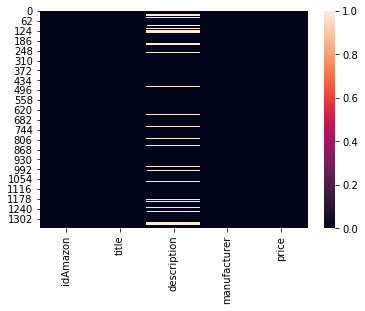

In [6]:
sns.heatmap(amz.isnull())

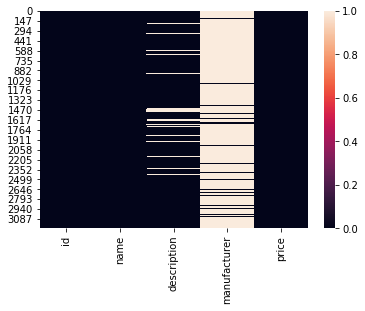

In [7]:
sns.heatmap(gg.isnull())

In [19]:
amz = pd.DataFrame(amz, columns= ['idAmazon','title','price'])
gg = pd.DataFrame(gg, columns= ['id','name','price'])
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def wordBigram(title):
    # singles = [stemmer.stem(plural) for plural in plurals]
    # tokenized = [stemmer.stem(x) for x in title.split if not x in stop_words and len(w)>3]
    tokenized = title.split()
    words = [w for w in tokenized if not w in stop_words and len(w)>3 and not w.isnumeric()]
    bigram = []
    bigram = list(combinations(words, 2))
    return bigram

idAmz = []
idGG = []
amzBlk = []
ggBlk = []

count = 0
for title in amz['title']:
    bigram = wordBigram(title)
    for gram in bigram:
        idAmz.append(amz['idAmazon'][count])
        amzBlk.append((gram))
    count += 1

count = 0
for title in gg['name']:
    bigram = wordBigram(title)
    for gram in bigram:
        idGG.append(gg['id'][count])
        ggBlk.append(gram)
    count += 1


In [20]:
len(idAmz)

9938

In [21]:
len(idGG)

56772

In [22]:
len(amzBlk)

9938

In [23]:
len(ggBlk)

56772

In [13]:
amz_csv = pd.DataFrame({'block_key':amzBlk, 'product_id': idAmz})
amz_csv.head()

,block_key,product_id
0,"(clickart, premier)",b000jz4hqo
1,"(clickart, image)",b000jz4hqo
2,"(clickart, pack)",b000jz4hqo
3,"(clickart, (dvd-rom))",b000jz4hqo
4,"(premier, image)",b000jz4hqo


In [14]:
gg_csv = pd.DataFrame({'block_key': ggBlk, 'product_id': idGG})

In [15]:
gg_csv.head()

,block_key,product_id
0,"(learning, quickbooks)",http://www.google.com/base/feeds/snippets/1112...
1,"(learning, 2007)",http://www.google.com/base/feeds/snippets/1112...
2,"(quickbooks, 2007)",http://www.google.com/base/feeds/snippets/1112...
3,"(superstart!, reading)",http://www.google.com/base/feeds/snippets/1153...
4,"(superstart!, writing!)",http://www.google.com/base/feeds/snippets/1153...


In [16]:
amz_csv.to_csv("amazon_blocks.csv", index=False)
gg_csv.to_csv("google_blocks.csv", index=False)